### Importación de datos



In [129]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# Exploración inicial de los datos

In [16]:
tienda.tail()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
2354,Iphone 15,Electrónicos,1284400.0,66600.0,15/11/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
2355,Impresora,Electrónicos,282800.0,15300.0,18/03/2023,Lucas Olivera,Bogotá,5,Nequi,1,4.60971,-74.08175
2356,Juego de mesa,Juguetes,122900.0,7200.0,06/07/2021,Lucas Olivera,Cali,5,Tarjeta de crédito,4,3.43722,-76.52250
2357,Cama box,Muebles,691300.0,35000.0,02/05/2022,Pedro Gomez,Pasto,1,Tarjeta de crédito,2,1.21361,-77.28111
2358,Smartwatch,Electrónicos,195000.0,8600.0,18/06/2022,Felipe Santos,Cali,4,Tarjeta de crédito,1,3.43722,-76.52250


In [11]:
type(tienda)

pandas.core.frame.DataFrame

In [17]:
tienda.shape

(2359, 12)

In [18]:
tienda.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')

In [22]:
tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


#1. Análisis de facturación



In [26]:
facturacion_1 = tienda["Precio"].sum()
facturacion_2 = tienda2["Precio"].sum()
facturacion_3 = tienda3["Precio"].sum()
facturacion_4 = tienda4["Precio"].sum()

In [53]:
facturacion = [facturacion_1, facturacion_2, facturacion_3, facturacion_4]
facturacion

[np.float64(1150880400.0),
 np.float64(1116343500.0),
 np.float64(1098019600.0),
 np.float64(1038375700.0)]

In [54]:
resumen_facturacion = pd.DataFrame({
    "Tienda":["Tienda 1", "Tienda 2", "Tienda 3","Tienda 4"], "Facturación Total":facturacion})
resumen_facturacion

,Tienda,Facturación Total
0,Tienda 1,1.150880e+09
1,Tienda 2,1.116344e+09
2,Tienda 3,1.098020e+09
3,Tienda 4,1.038376e+09


## visualización

<Axes: title={'center': 'Comparación de facturación total por tienda'}, xlabel='Tienda', ylabel='Facturación total'>

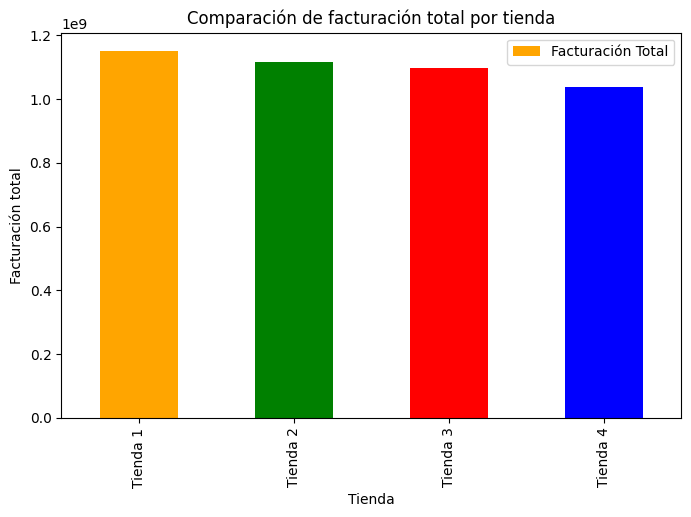

In [106]:
resumen_facturacion.plot(kind='bar',figsize=(8, 5), x='Tienda',y='Facturación Total',
                         title="Comparación de facturación total por tienda",
        color=['orange','green','red','blue'], xlabel='Tienda',ylabel='Facturación total')

## Recomendación

Después del análisis, la tienda que debe vender el Sr. Juan es la **tienda 4** porque ha obtenido la facturación más baja en comparación con la sotras tiendas.

# 2. Ventas por categoría

In [111]:
categoria_1= tienda["Categoría del Producto"].value_counts()
categoria_1

,count
Categoría del Producto,
Muebles,465
Electrónicos,448
Juguetes,324
Electrodomésticos,312
Deportes y diversión,284
Instrumentos musicales,182
Libros,173
Artículos para el hogar,171


<Axes: title={'center': 'Ventas por categoría de la tienda 1'}, xlabel='Cantidad de ventas', ylabel='Categoría del Producto'>

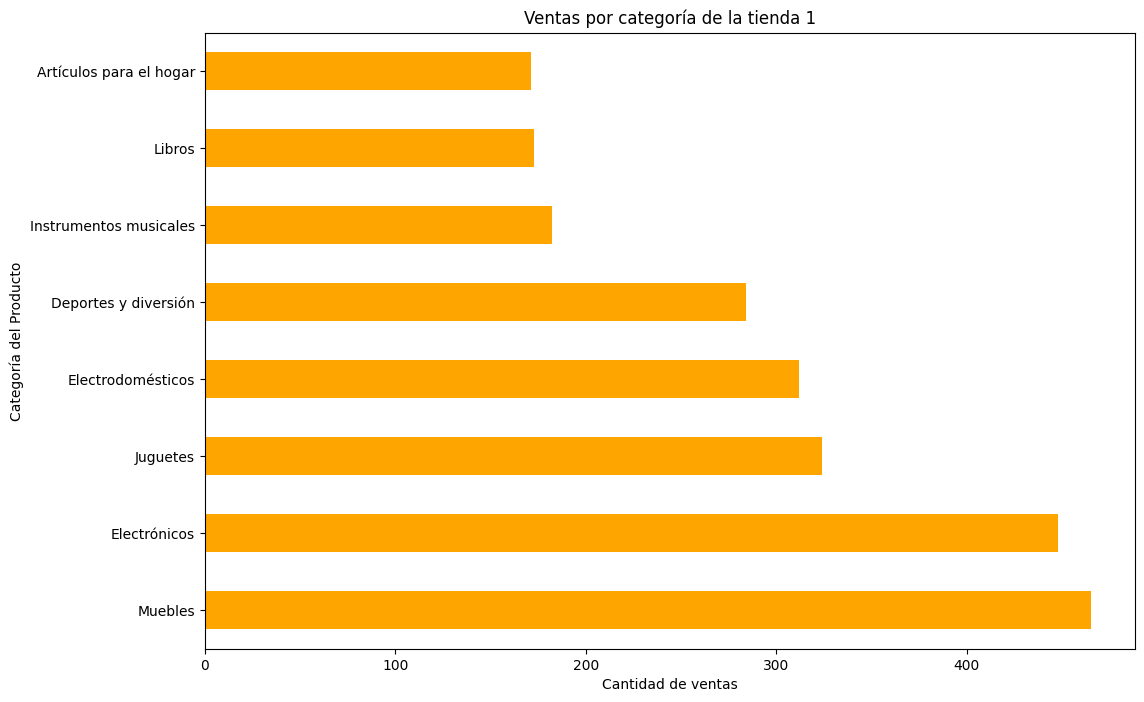

In [117]:
categoria_1.plot(kind='barh',figsize=(12, 8), title="Ventas por categoría de la tienda 1",
        color='orange', xlabel='Cantidad de ventas',ylabel='Categoría del Producto')

In [113]:
categoria_2= tienda2["Categoría del Producto"].value_counts()
categoria_2

,count
Categoría del Producto,
Muebles,442
Electrónicos,422
Juguetes,313
Electrodomésticos,305
Deportes y diversión,275
Instrumentos musicales,224
Libros,197
Artículos para el hogar,181


<Axes: title={'center': 'Ventas por categoría de la tienda 2'}, xlabel='Cantidad de ventas', ylabel='Categoría del Producto'>

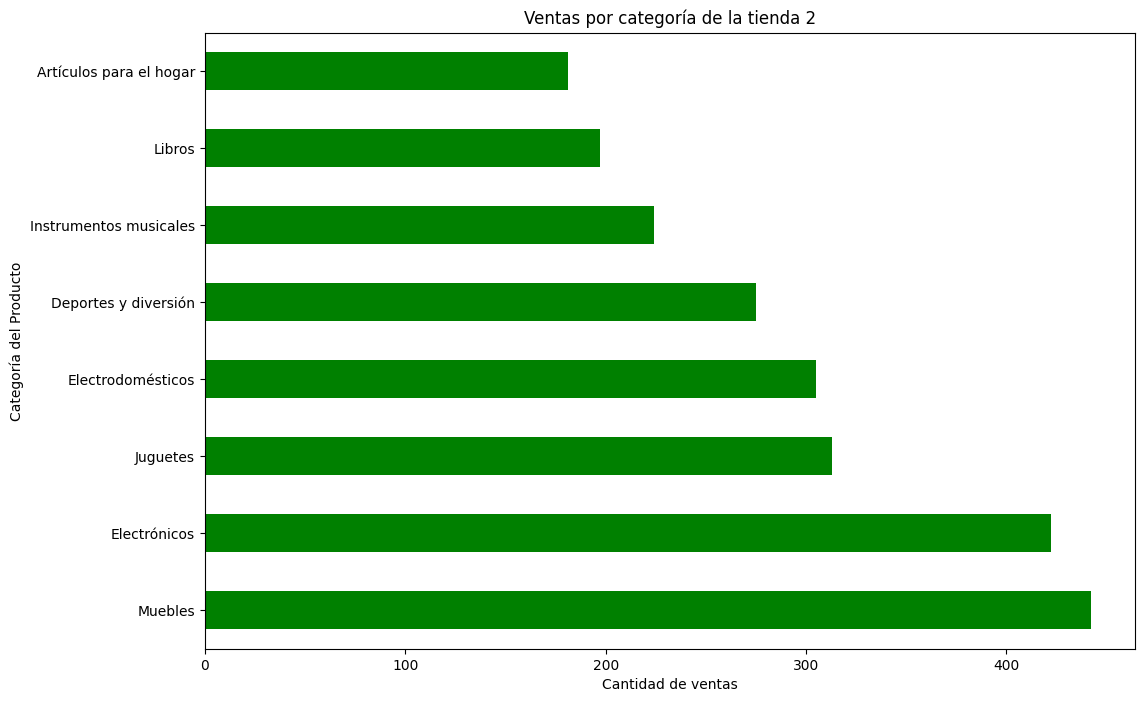

In [118]:
categoria_2.plot(kind='barh',figsize=(12, 8), title="Ventas por categoría de la tienda 2",
        color='green', xlabel='Cantidad de ventas',ylabel='Categoría del Producto')

In [82]:
categoria_3= tienda3["Categoría del Producto"].value_counts()
categoria_3

,count
Categoría del Producto,
Muebles,499
Electrónicos,451
Juguetes,315
Electrodomésticos,278
Deportes y diversión,277
Libros,185
Instrumentos musicales,177
Artículos para el hogar,177


<Axes: title={'center': 'Ventas por categoría de la tienda 3'}, xlabel='Cantidad de ventas', ylabel='Categoría del Producto'>

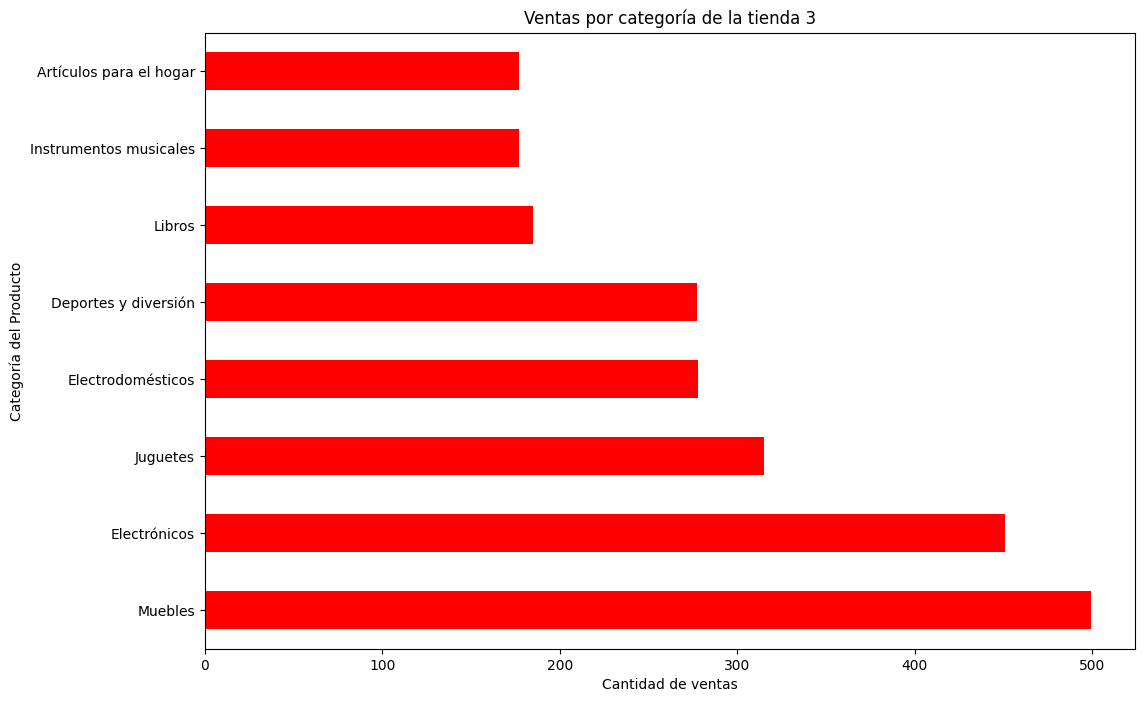

In [116]:
categoria_3.plot(kind='barh',figsize=(12, 8), title="Ventas por categoría de la tienda 3",
        color='red', xlabel='Cantidad de ventas',ylabel='Categoría del Producto')

In [83]:
categoria_4= tienda4["Categoría del Producto"].value_counts()
categoria_4

,count
Categoría del Producto,
Muebles,480
Electrónicos,451
Juguetes,338
Deportes y diversión,277
Electrodomésticos,254
Artículos para el hogar,201
Libros,187
Instrumentos musicales,170


<Axes: title={'center': 'Ventas por categoría de la tienda 4'}, xlabel='Cantidad de ventas', ylabel='Categoría del Producto'>

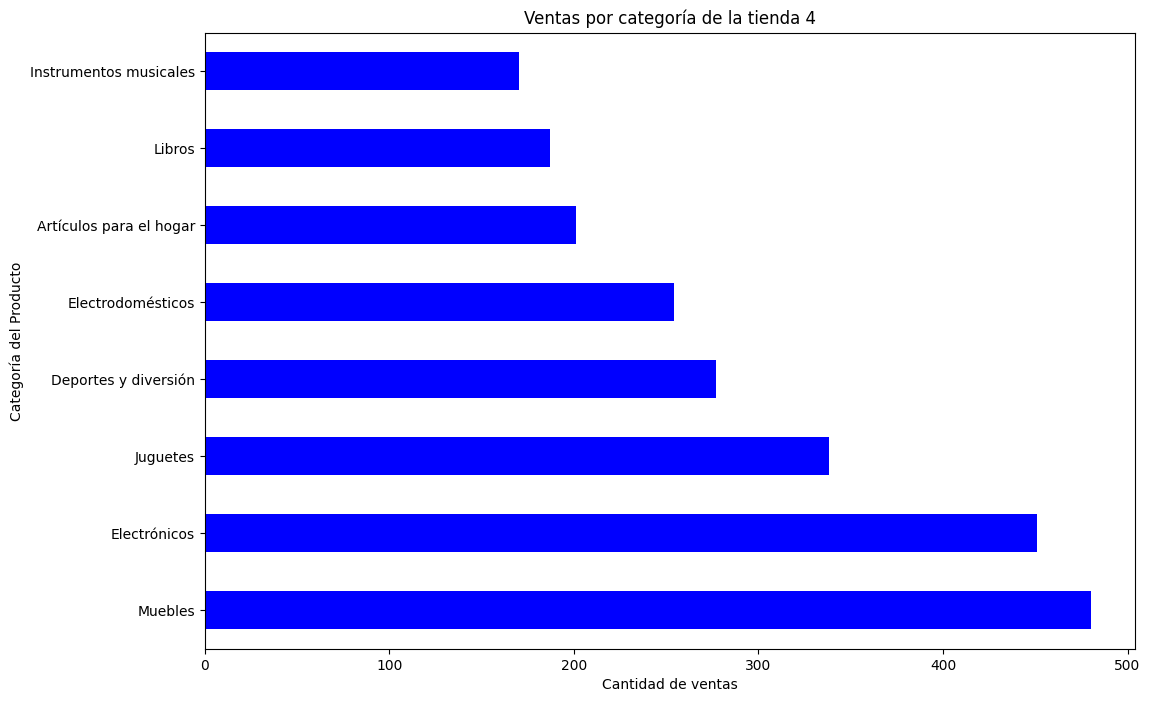

In [119]:
categoria_4.plot(kind='barh',figsize=(12, 8), title="Ventas por categoría de la tienda 4",
        color='blue', xlabel='Cantidad de ventas',ylabel='Categoría del Producto')

# 3. Calificación promedio de la tienda


In [232]:
calificacion_1 = round(tienda["Calificación"].mean(),2)
calificacion_2 = round(tienda2["Calificación"].mean(),2)
calificacion_3 = round(tienda3["Calificación"].mean(),2)
calificacion_4 = round(tienda4['Calificación'].mean(),2)

In [233]:
calificacion = [calificacion_1, calificacion_2, calificacion_3, calificacion_4]
calificacion

[np.float64(3.98), np.float64(4.04), np.float64(4.05), np.float64(4.0)]

In [234]:
resumen_califcacion = pd.DataFrame({
    "Tienda":["Tienda 1", "Tienda 2", "Tienda 3","Tienda 4"], "Calificación":calificacion})
resumen_califcacion

,Tienda,Calificación
0,Tienda 1,3.98
1,Tienda 2,4.04
2,Tienda 3,4.05
3,Tienda 4,4.00


Después del análisis, podemos observar que la tienda 3 es la que tiene mayor calificación.

# 4. Productos más y menos vendidos

In [252]:
productos_1= tienda["Producto"].value_counts().head(4)
productos_1

,count
Producto,
Microondas,60
TV LED UHD 4K,60
Armario,60
Secadora de ropa,58


<Axes: title={'center': 'Productos más vendidos de la tienda 1'}, xlabel='Producto', ylabel='Cantidad de ventas'>

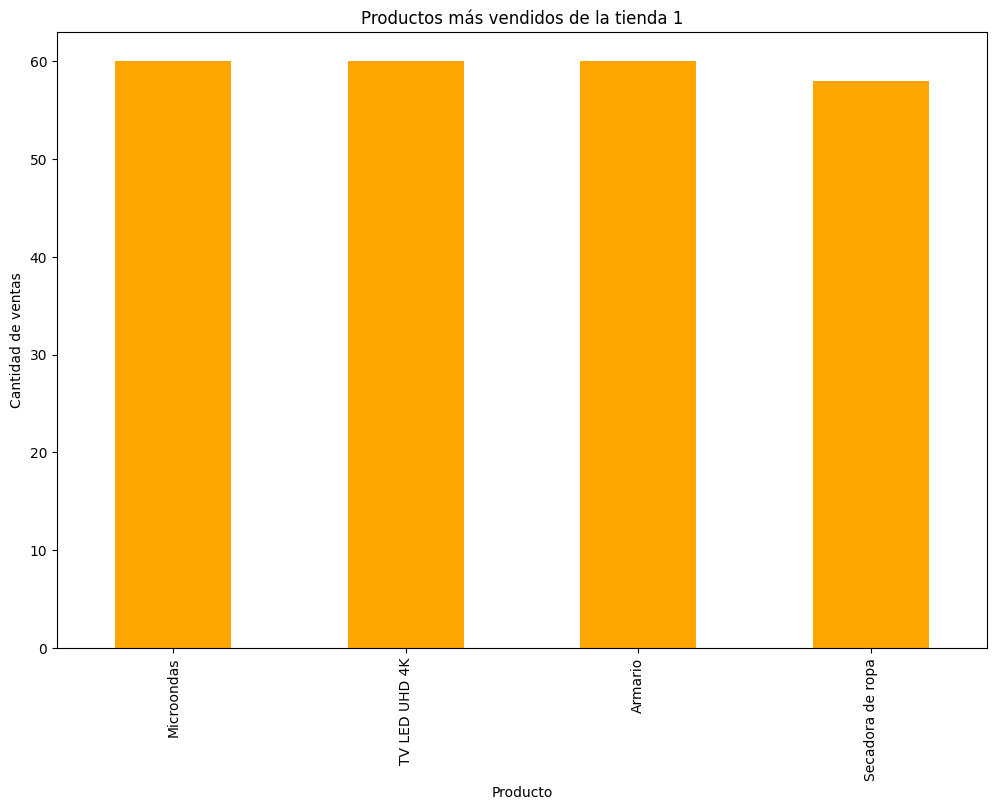

In [253]:
productos_1.head(4).plot(kind='bar',figsize=(12, 8), title="Productos más vendidos de la tienda 1",
                         color='orange', xlabel='Producto',ylabel='Cantidad de ventas')

In [254]:
productos_1= tienda["Producto"].value_counts().tail(4)
productos_1

,count
Producto,
Pandereta,36
Olla de presión,35
Auriculares con micrófono,33
Celular ABXY,33


<Axes: title={'center': 'Productos menos vendidos de la tienda 1'}, xlabel='Producto', ylabel='Cantidad de ventas'>

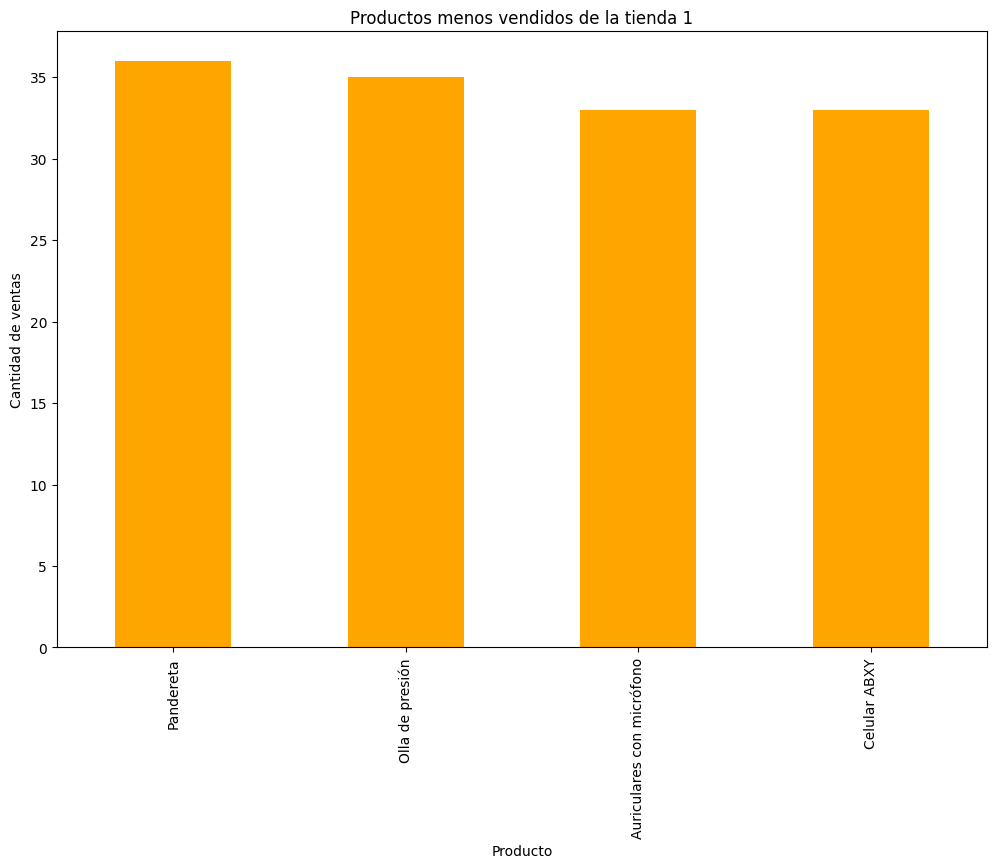

In [256]:
productos_1.tail(4).plot(kind='bar',figsize=(12, 8), title="Productos menos vendidos de la tienda 1",
                         color='orange', xlabel='Producto',ylabel='Cantidad de ventas')

In [215]:
productos_2= tienda2["Producto"].value_counts().head(4)
productos_2

,count
Producto,
Iniciando en programación,65
Microondas,62
Batería,61
Guitarra acústica,58


<Axes: title={'center': 'Productos más vendidos de la tienda 2'}, xlabel='Producto', ylabel='Cantidad de ventas'>

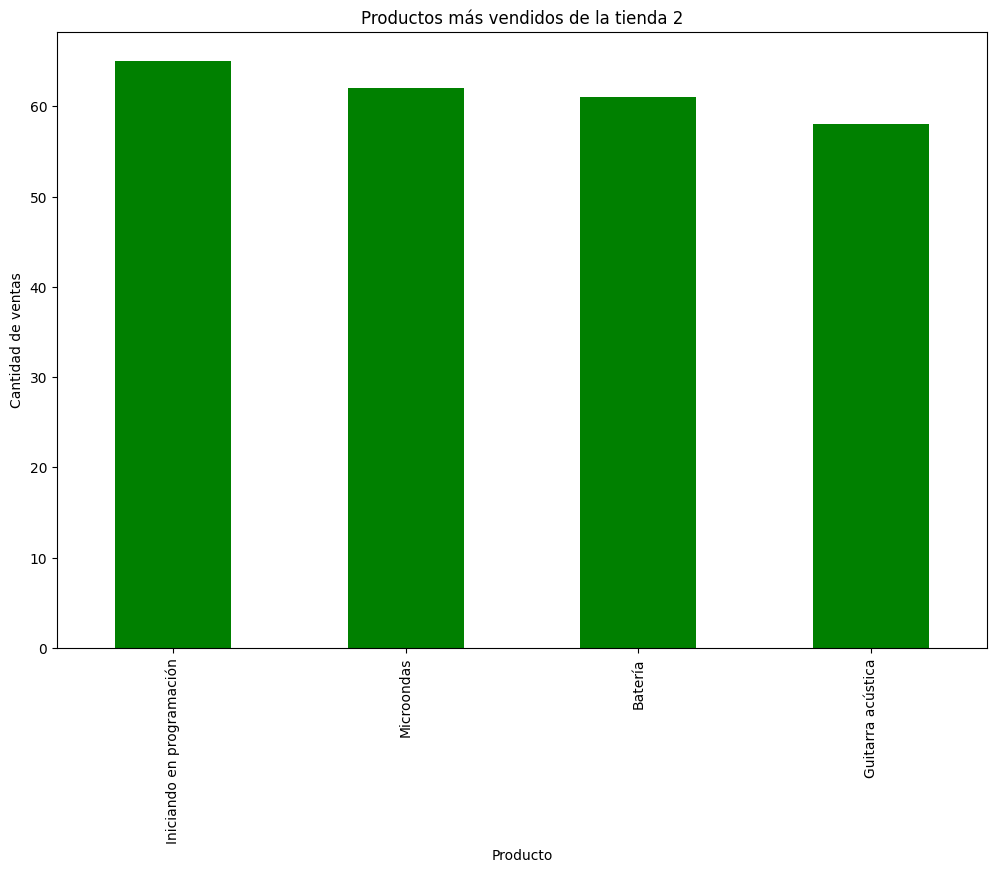

In [204]:
productos_2.head(4).plot(kind='bar',figsize=(12, 8), title="Productos más vendidos de la tienda 2",
                         color='green', xlabel='Producto',ylabel='Cantidad de ventas')

In [257]:
productos_2= tienda2["Producto"].value_counts().tail(4)
productos_2

,count
Producto,
Sillón,35
Mesa de comedor,34
Impresora,34
Juego de mesa,32


<Axes: title={'center': 'Productos menos vendidos de la tienda 2'}, xlabel='Producto', ylabel='Cantidad de ventas'>

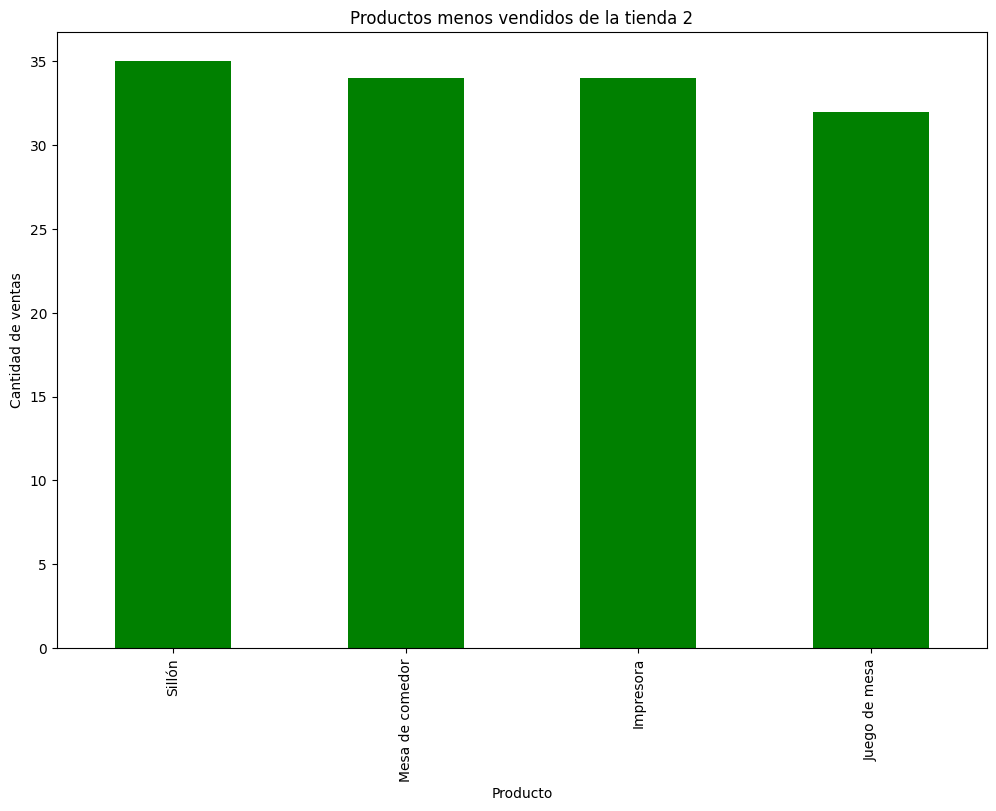

In [259]:
productos_2.tail(4).plot(kind='bar',figsize=(12, 8), title="Productos menos vendidos de la tienda 2",
                         color='green', xlabel='Producto',ylabel='Cantidad de ventas')

In [260]:
productos_3= tienda3["Producto"].value_counts().head(4)
productos_3

,count
Producto,
Kit de bancas,57
Mesa de comedor,56
Cama king,56
Set de ollas,55


<Axes: title={'center': 'Productos más vendidos de la tienda 3'}, xlabel='Producto', ylabel='Cantidad de ventas'>

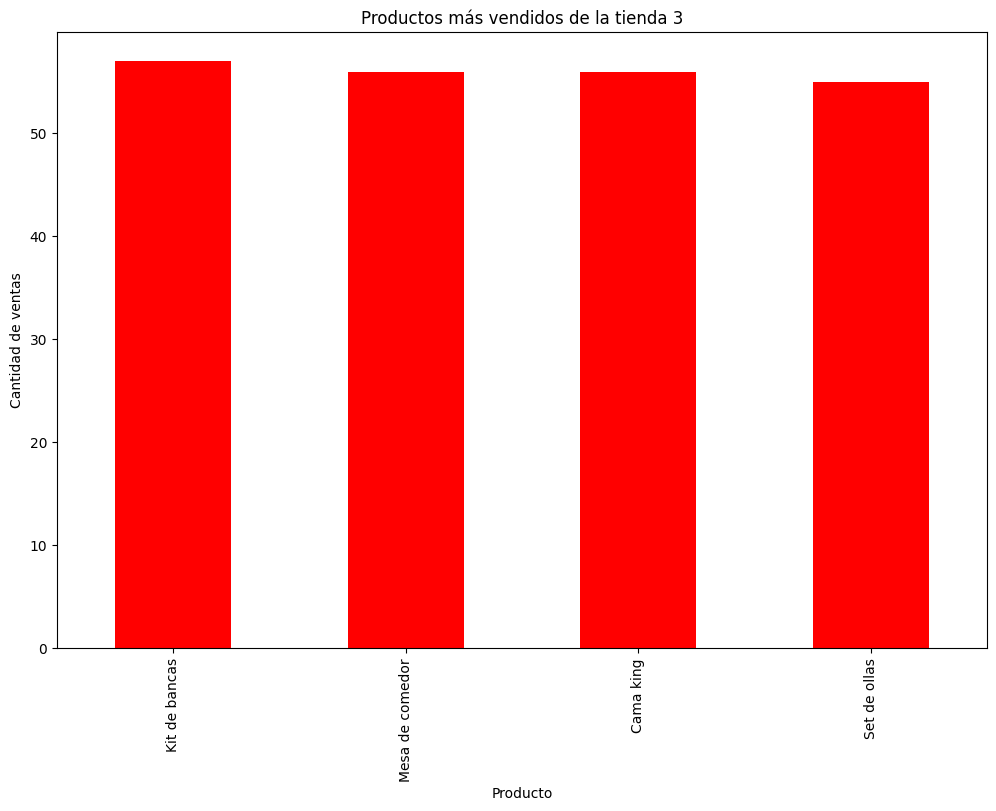

In [261]:
productos_3.head(4).plot(kind='bar',figsize=(12, 8), title="Productos más vendidos de la tienda 3",
                         color='red', xlabel='Producto',ylabel='Cantidad de ventas')

In [264]:
productos_3=tienda3["Producto"].value_counts().tail(4)
productos_3

,count
Producto,
Set de vasos,36
Mochila,36
Microondas,36
Bloques de construcción,35


<Axes: title={'center': 'Productos menos vendidos de la tienda 3'}, xlabel='Producto', ylabel='Cantidad de ventas'>

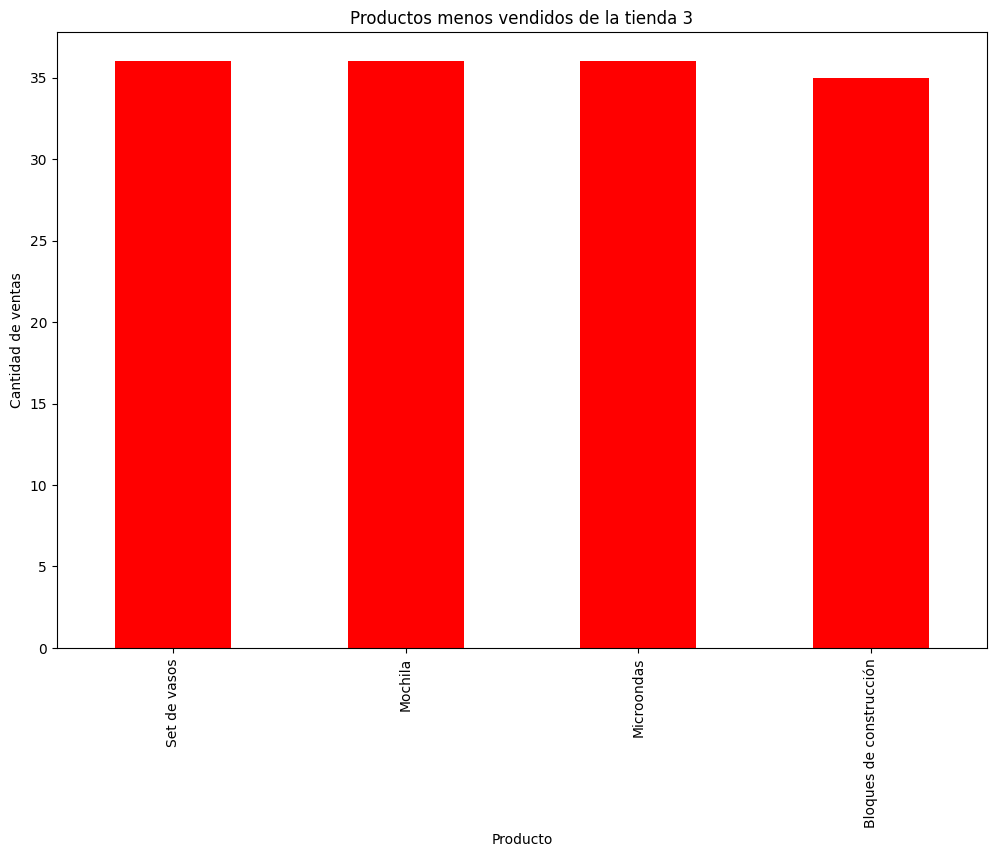

In [265]:
productos_3.tail(4).plot(kind='bar',figsize=(12, 8), title="Productos menos vendidos de la tienda 3",
                         color='red', xlabel='Producto',ylabel='Cantidad de ventas')

In [266]:
productos_4= tienda4["Producto"].value_counts().head(4)
productos_4

,count
Producto,
Cama box,62
Cubertería,59
Dashboards con Power BI,56
Cama king,56


<Axes: title={'center': 'Productos más vendidos de la tienda 4'}, xlabel='Producto', ylabel='Cantidad de ventas'>

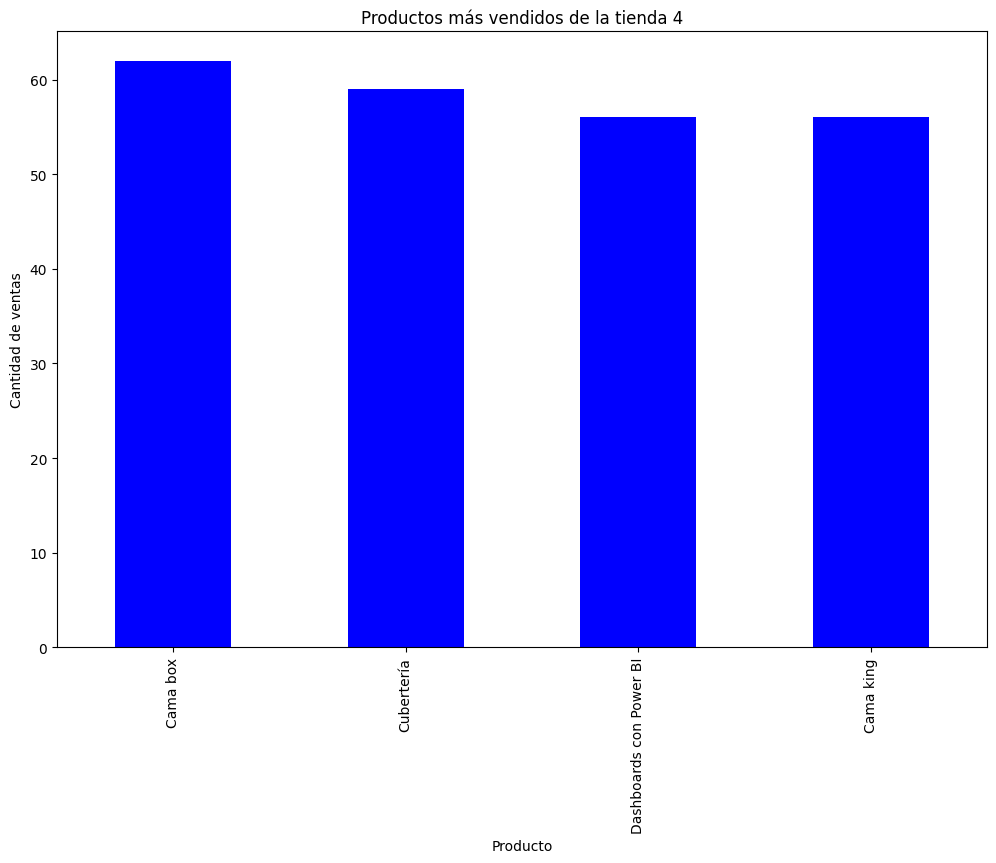

In [267]:
productos_4.head(4).plot(kind='bar',figsize=(12, 8), title="Productos más vendidos de la tienda 4",
                         color='blue', xlabel='Producto',ylabel='Cantidad de ventas')

In [269]:
productos_4=tienda4["Producto"].value_counts().tail(4)
productos_4

,count
Producto,
Ciencia de datos con Python,38
Guitarra acústica,37
Armario,34
Guitarra eléctrica,33


<Axes: title={'center': 'Productos menos vendidos de la tienda 4'}, xlabel='Producto', ylabel='Cantidad de ventas'>

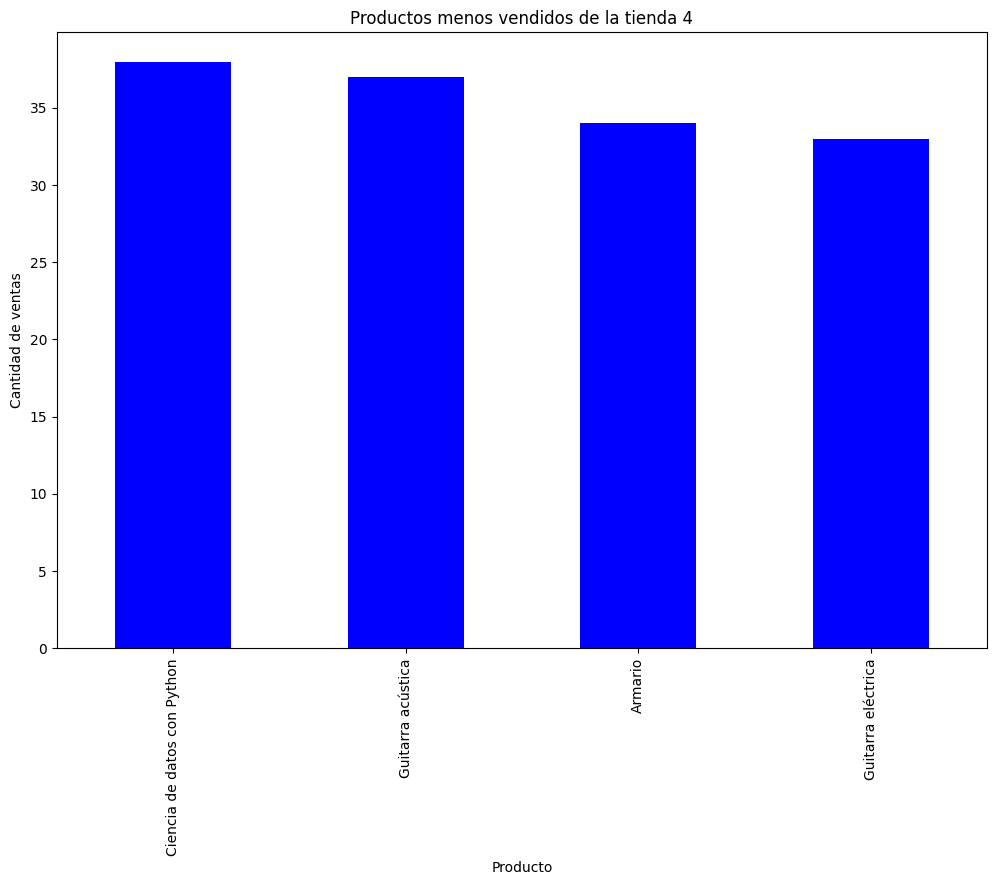

In [270]:
productos_4.tail(4).plot(kind='bar',figsize=(12, 8), title="Productos menos vendidos de la tienda 4",
                         color='blue', xlabel='Producto',ylabel='Cantidad de ventas')

# 5. Envío promedio por tienda

In [222]:
envio_1 = tienda['Costo de envío'].mean()
envio_2 = tienda2['Costo de envío'].mean()
envio_3 = tienda3['Costo de envío'].mean()
envio_4 = tienda4['Costo de envío'].mean()

In [223]:
envio = [envio_1, envio_2, envio_3, envio_4]
envio

[np.float64(26018.60958033065),
 np.float64(25216.235693090293),
 np.float64(24805.680373039424),
 np.float64(23459.457167090754)]

In [224]:
resumen_envio = pd.DataFrame({
    "Tienda":["Tienda 1", "Tienda 2", "Tienda 3","Tienda 4"], "Costo de Envio":envio})
resumen_envio

,Tienda,Costo de Envio
0,Tienda 1,26018.609580
1,Tienda 2,25216.235693
2,Tienda 3,24805.680373
3,Tienda 4,23459.457167


# RECOMENDACIÓN

Al analizar las facturaciones totales, las categorías principales, la calificación promedio, los productos más y menos vendidos, y el envio promedio en las cuatro tiendas, se puede concluir que existen claras diferencias en el comportamiento de ventas entre ellas.
La tienda 4 tiene la mayor facturación total y además cuenta con una gama más amplia de productos con alta rotación. Esto indica una base de clientes más amplia y una actividad comercial más dinámica, lo que favorece la posibilidad de introducir nuevos productos con buena aceptación.
Por otro lado, si bien las tiendas 1, 2 y 3 tienen un flujo de ventas sólido, tienen un volumen general menor y una mayor concentración en algunas categorías, lo que puede limitar el crecimiento en el corto plazo. Por lo tanto, **se recomienda al Sr. Juan vender sus productos en la tienda 4**, ya que los datos muestran que esta es la que genera más ingresos y demanda constante, lo que brinda más oportunidades de ventas y expansión.

# Extra! Análisis del desempeño geográfico

In [271]:
import pandas as pd
import matplotlib.pyplot as plt

In [272]:
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
]

In [273]:
tiendas = [pd.read_csv(url) for url in urls]

In [287]:
for i, df in enumerate(tiendas, start=1):
    df["tienda"] = f"tienda {i}"

In [297]:
df_total = pd.concat(tiendas)

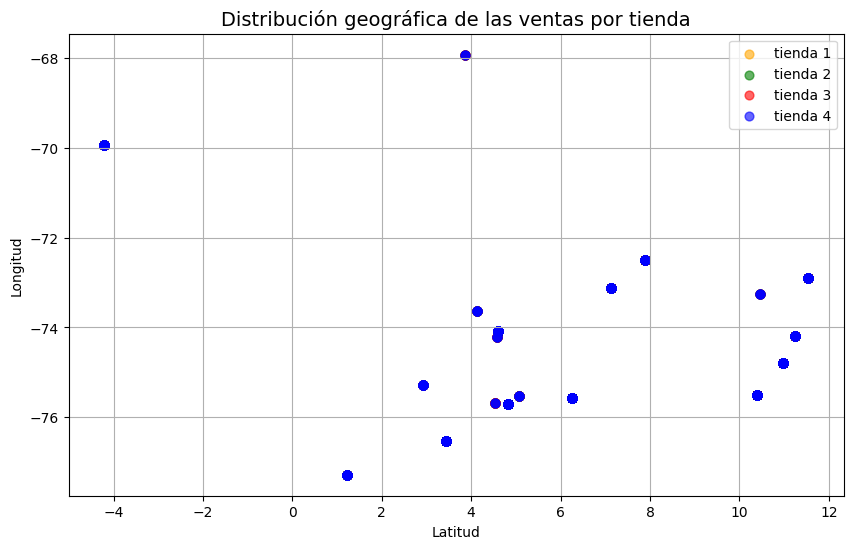

In [301]:
plt.figure(figsize=(10,6))
colores = ["orange", "green","red", "blue"]
for (nombre, grupo), color in zip(df_total.groupby("tienda"), colores):
    plt.scatter(grupo["lat"], grupo["lon"], s=40, alpha=0.6, label=nombre, color=color)

plt.title("Distribución geográfica de las ventas por tienda", fontsize=14)

plt.xlabel("Latitud")
plt.ylabel("Longitud")
plt.legend()
plt.grid(True)
plt.show()

In [290]:
!pip install folium

In [279]:
import folium
from folium.plugins import HeatMap

In [291]:
centro = [df_total["lat"].mean(), df_total["lon"].mean()]
mapa = folium.Map(location=centro, zoom_start=4)

In [302]:
colores = {
    "Tienda 1": "orange",
    "Tienda 2": "green",
    "Tienda 3": "red",
    "Tienda 4": "blue"
}

In [303]:
for tienda, datos in df_total.groupby("tienda"):
    HeatMap(data=datos[["lat", "lon"]], name=tienda, radius=10).add_to(mapa)

folium.LayerControl().add_to(mapa)

In [304]:
mapa

Se utilizó la información de latitud y longitud de cada transacción para analizar la distribución geográfica de las ventas de las cuatro tiendas.

El gráfico muestra que la **Tienda 4** concentra la mayor cantidad de puntos en un área específica, lo que refleja una **alta concentración de ventas** y presencia comercial fuerte.  
En cambio, las **Tiendas 1, 2 y 3** presentan una distribución más dispersa y con menor densidad, lo que sugiere menor volumen de ventas o cobertura más limitada.

> 💡 Este análisis confirma los resultados de facturación: la Tienda 4 no solo factura más, sino que también domina geográficamente el mercado.